In [107]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

# Math
import math

# Plot imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

# Import the stats librayr from numpy
from scipy import stats


from sklearn.neighbors import KNeighborsClassifier


In [3]:
#To read the Excel file
xlsfile = pd.ExcelFile('Project_case_study.xlsx')

In [17]:
dframe1 = xlsfile.parse('Existing employees')

In [18]:
dframe1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [27]:
dframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [19]:
dframe2 = xlsfile.parse('Employees who have left')

In [38]:
dframe2

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low
5,6,0.41,0.50,2,153,3,0,0,sales,low
6,7,0.10,0.77,6,247,4,0,0,sales,low
7,8,0.92,0.85,5,259,5,0,0,sales,low
8,9,0.89,1.00,5,224,5,0,0,sales,low
9,10,0.42,0.53,2,142,3,0,0,sales,low


In [28]:
dframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [8]:
#To get a general view of the dataset, we visualize it and analyze it.

In [9]:
dframe1['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

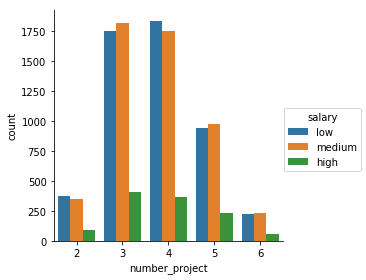

In [10]:
sns.factorplot('number_project',data=dframe1,kind='count',hue='salary')

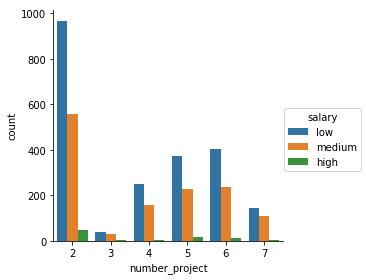

In [11]:
sns.factorplot('number_project',data=dframe2,kind='count',hue='salary')

Comparing the above two plots, we can see that the employees who have lower number of projects, and low or medium salary tend to leave. Also, employees with lower number of projects and high salary do not tend to leave.
Another observation is that employees with low or medium salaries with high number of projects tend to leave.

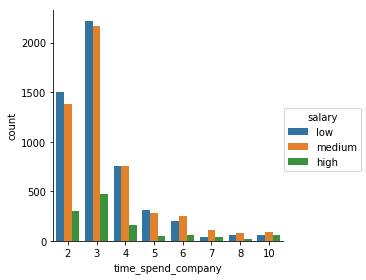

In [12]:
sns.factorplot('time_spend_company',data=dframe1,kind='count',hue='salary')

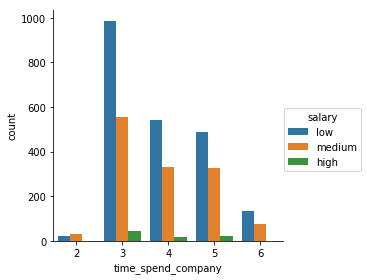

In [13]:
sns.factorplot('time_spend_company',data=dframe2,kind='count',hue='salary')

The employees with low or medium salaries and lesser time spent in the company tend to leave.

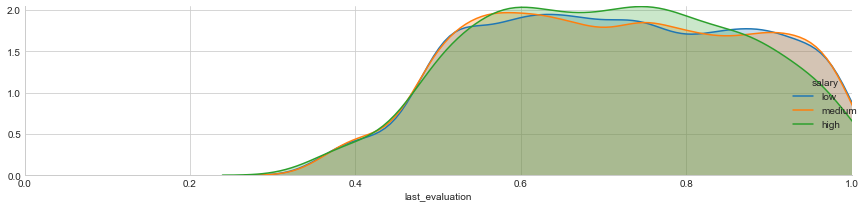

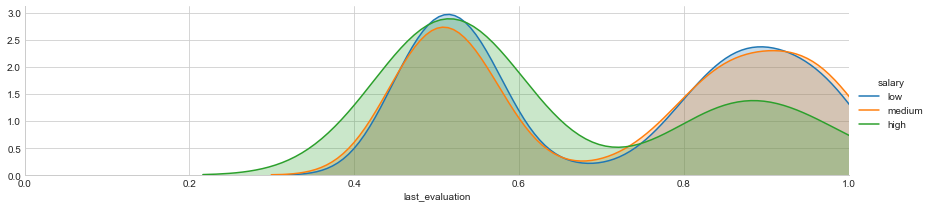

In [111]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot


fig = sns.FacetGrid(dframe1, hue="salary",aspect=4)
fig2 = sns.FacetGrid(dframe2, hue="salary",aspect=4)

# using map to plot all the possible kdeplots for the 'time_spend_company' column by the hue choice
fig.map(sns.kdeplot,'last_evaluation',shade= True)
fig2.map(sns.kdeplot,'last_evaluation',shade= True)
# Set the x max limit
obj1=dframe1['last_evaluation'].max()
obj2=dframe2['last_evaluation'].max()
#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,obj1))
fig2.set(xlim=(0,obj2))
#Add a legend
fig.add_legend()
fig2.add_legend()

We can observe that the people who spend moderate time in the company are the ones most likely to leave. It is not the employees who just joined or have worked for a long time. 

We check the value counts for various columns to make observations.

In [14]:
dframe1['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [20]:
dframe2['salary'].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [21]:
dframe1['number_project'].value_counts()

3    3983
4    3956
5    2149
2     821
6     519
Name: number_project, dtype: int64

In [22]:
dframe2['number_project'].value_counts()

2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64

In [25]:
dframe1['time_spend_company'].value_counts()

3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [26]:
dframe2['time_spend_company'].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

So, we can see that employees who spend too less time or too much time are not likely to leave the company.

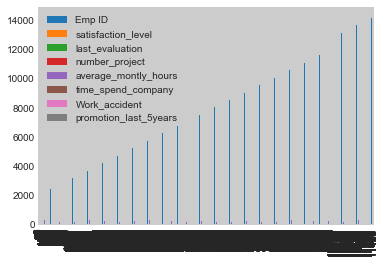

In [35]:
dframe1.plot(kind = 'bar')

To predict the employees who are bound to leave, we need a fast training, linear model. Hence, we use Logistic Regression to build our model.

Text(0.5,1,' Logistic Function ')

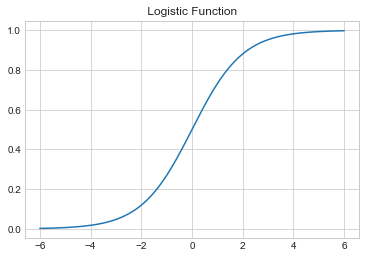

In [32]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

We define functions to create a new column 'Left_or_not' to specify whether the employee has left or not. '1' specifies, that the employee has left, and '0' specifies that the employee has not left. So, we initialize all the dframe1 rows to 0, and the dframe2 rows to 1.

In [41]:
def func1(x):
    return 0

def func2(x):
    return 1

dframe1['Left_or_not'] = dframe1['time_spend_company'].apply(func1)
dframe2['Left_or_not'] = dframe2['time_spend_company'].apply(func2)

In [42]:
dframe1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left_or_not
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [43]:
dframe2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left_or_not
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


Now, we combine the two dataframes together to build our testing and training set.

In [46]:
dframe3 = pd.concat([dframe1,dframe2],axis = 0)

In [50]:
dframe3

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left_or_not
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
5,2006,0.36,0.95,3,206,4,0,0,sales,low,0
6,2007,0.54,0.37,2,176,2,0,0,sales,low,0
7,2008,0.99,0.91,5,136,4,0,0,sales,low,0
8,2009,0.50,0.75,6,127,3,0,0,sales,low,0
9,2010,0.74,0.64,4,268,3,0,0,sales,low,0


Now, we analyse the combined dataframe to make observations to predict the employees who are leaving.

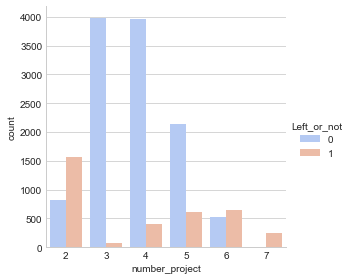

In [55]:
sns.factorplot('number_project',data=dframe3,hue='Left_or_not',palette='coolwarm',kind = 'count')

We notice that the employees with really low number of projects tend to leave the company.

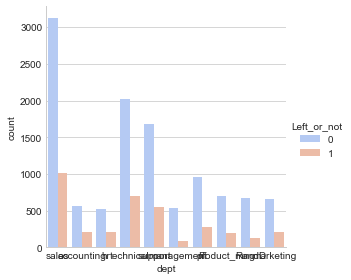

In [56]:
sns.factorplot('dept',data=dframe3,hue='Left_or_not',palette='coolwarm',kind = 'count')

We can see that the highest people leaving are from the department of sales and technical.

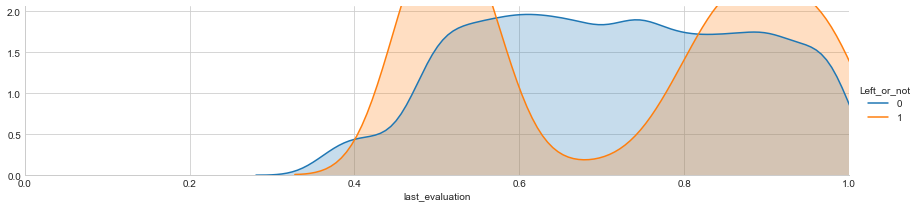

In [113]:

fig = sns.FacetGrid(dframe3, hue="Left_or_not",aspect=4)


# using map to plot all the possible kdeplots for the 'time_spend_company' column by the hue choice
fig.map(sns.kdeplot,'last_evaluation',shade= True)

# Set the x max limit
obj1=dframe3['last_evaluation'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,obj1))

#Add a legend
fig.add_legend()


Now, we create dummy variables to hold the columns of categorical variables.

In [57]:
Work_accident_dummies = pd.get_dummies(dframe3['Work_accident'])

In [58]:
promotion_last_5years_dummies = pd.get_dummies(dframe3['promotion_last_5years'])

In [72]:
promotion_last_5years_dummies.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [59]:
salary_dummies = pd.get_dummies(dframe3['salary'])

In [60]:
Work_accident_dummies.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [61]:
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [62]:
time_spend_company_dummies = pd.get_dummies(dframe3['time_spend_company'])

In [63]:
time_spend_company_dummies.head()

,2,3,4,5,6,7,8,10
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [64]:
number_project_dummies = pd.get_dummies(dframe3['number_project'])

In [65]:
number_project_dummies.head()

,2,3,4,5,6,7
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [66]:
dept_dummies = pd.get_dummies(dframe3['dept'])

In [67]:
dept_dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [68]:
number_project_dummies.columns = ['proj2','proj3','proj4','proj5','proj6','proj7']

In [70]:
time_spend_company_dummies.columns = ['yrs2','yrs3','yrs4','yrs5','yrs6','yrs7','yrs8','yrs10']

In [71]:
Work_accident_dummies.columns = ['workacc0','workacc1']

In [73]:
promotion_last_5years_dummies.columns = ['prom0','prom1']

Now, we create a dataframe without the categorical variable columns and the Y target

In [85]:
X = dframe3.drop(['promotion_last_5years','Work_accident','time_spend_company','number_project','dept','salary','Left_or_not'],axis = 1)

In [86]:
dummies = pd.concat([promotion_last_5years_dummies,Work_accident_dummies,time_spend_company_dummies,number_project_dummies,dept_dummies,salary_dummies],axis=1)

In [87]:
X = pd.concat([X,dummies],axis=1)

In [88]:
X.head()

,Emp ID,satisfaction_level,last_evaluation,average_montly_hours,prom0,prom1,workacc0,workacc1,yrs2,yrs3,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,2001,0.58,0.74,215,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,2002,0.82,0.67,202,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2003,0.45,0.69,193,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,2004,0.78,0.82,247,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2005,0.49,0.60,214,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Setting the Y target

In [89]:
Y = dframe3.Left_or_not

In [90]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Left_or_not, dtype: int64

We must make sure that the Y target is in the form of a one dimensional array

In [91]:
Y = np.ravel(Y)
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
X = X.drop('yrs2',axis=1)
X = X.drop('hr',axis=1)
X = X.drop('prom0',axis=1)
X = X.drop('workacc0',axis=1)
X = X.drop('low',axis=1)

X.head()

,Emp ID,satisfaction_level,last_evaluation,average_montly_hours,prom1,workacc1,yrs3,yrs4,yrs5,yrs6,...,RandD,accounting,management,marketing,product_mng,sales,support,technical,high,medium
0,2001,0.58,0.74,215,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2002,0.82,0.67,202,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2003,0.45,0.69,193,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2004,0.78,0.82,247,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2005,0.49,0.60,214,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
# Creating a Logistic Regression Class object
logreg = LogisticRegression()

# Spliting the data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

# Training the model with the training set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Checking accuracy
print (metrics.accuracy_score(Y_test,Y_pred))

0.884333333333


Hence, we get an accuracy score of 0.884333.. 
A better model will result in a better accuracy score. So, we implement the K-nearest neighbours algorithm on this dataset.

In [106]:
# For k=6

# Importing the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)

# Fitting the data
knn.fit(X_train,Y_train)

# Running a prediction
Y_pred = knn.predict(X_test)

# Checking Accuracy against the Testing Set
print (metrics.accuracy_score(Y_test,Y_pred))

0.999


Therefore, we get an accuracy score of 0.999!!!! So, this is clearly a better model. 
Now, we check for other points in the feature space to our testing data point.So, we cycle through various k values and find the optimal value.

In [109]:
# Testing k values 1 through 20
k_range = range(1, 21)

# Setting an empty list
accuracy = []

# Repeating above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Finally, we plot the results of accuracies for various values of k or for various points in the feature space to our testing data point.

Text(0,0.5,'Testing Accuracy')

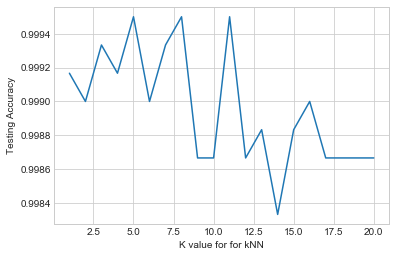

In [110]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

Therefore, we get the highest accuracy scores for k = 5,8,11 approximately.
Hence the model to predict the employees leaving is successfully constructed!!!